In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

Data set reading :

In [2]:
data = pd.read_csv('../Malware-Detection-Using-Machine-Learning/data-set/MalwareDataSet.csv') 

In [3]:
data

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1
...,...,...,...,...,...,...,...,...,...
137439,123291,11,0,5,33088,1048576,5,81654,0
137440,40000,2,6,1,32768,1048576,8,67624,0
137441,59610,10,0,5,33088,1048576,5,22648,0
137442,51216,2,0,1,0,1048576,8,2216,0


In [4]:
data.shape

(137444, 9)

In [5]:
data.describe()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,1.374440e+05,137444.000000,137444.000000,137444.000000,137444.000000,1.374440e+05,137444.000000,1.374440e+05,137444.000000
mean,1.722186e+05,8.620784,68.731876,5.098738,22301.043436,9.306841e+05,4.997119,2.474766e+05,0.297707
std,3.438014e+06,4.095635,1185.709873,99.437584,15444.753219,5.553175e+05,1.917237,2.129516e+07,0.457252
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.272100e+04,8.000000,0.000000,4.000000,320.000000,1.048576e+06,4.000000,2.216000e+03,0.000000
50%,5.300800e+04,9.000000,0.000000,5.000000,33088.000000,1.048576e+06,5.000000,9.640000e+03,0.000000
75%,6.157800e+04,10.000000,6.000000,5.000000,33088.000000,1.048576e+06,5.000000,2.376250e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


In [6]:
data.groupby(data['legitimate']).size()

legitimate
0    96526
1    40918
dtype: int64

We have a total of 137.444 data. There are 96.526 safe and 40.918 malware.

In [7]:
features = data.iloc[:,[0,1,2,3,4,5,6,7]].values # extracting the first 8 columns from the dataset - features

In [8]:
features

array([[  10407,       9,       6, ...,  262144,       4,     952],
       [   5354,       9,       6, ...,  262144,       4,     952],
       [  58807,       9,       6, ...,  262144,       4,  136490],
       ...,
       [  59610,      10,       0, ..., 1048576,       5,   22648],
       [  51216,       2,       0, ..., 1048576,       8,    2216],
       [  22731,      11,       0, ..., 1048576,       5,  318464]])

In [9]:
ifMalware = data.iloc[:,8].values  # extracting the legitimate column of the dataset - safe & malware results

In [10]:
ifMalware

array([1, 1, 1, ..., 0, 0, 0])

We will use 75% of our dataset for training and 25% for testing :

In [11]:
features_train, features_test, ifMalware_train, ifMalware_test = train_test_split(features, ifMalware, test_size=0.25)

Learning and Predict :

In [12]:
knModel = KNeighborsClassifier(n_neighbors=1) # Defined the model.

In [13]:
knModel.fit(features_train, ifMalware_train) # Provided training data.

KNeighborsClassifier(n_neighbors=1)

In [14]:
knPredict = knModel.predict(features_test) # Give the test data then call predict.

Results :

In [15]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifMalware_test != knPredict).sum()))

Number of mislabeled out of a total of 34361 test entries: 838


In [16]:
successRate = 100 * f1_score(ifMalware_test, knPredict, average='micro') # Success rate calculation

In [17]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")

The Success Rate was calculated as % : 97.56118855679404 with the K-Nearest-Neighbors


Visualization :

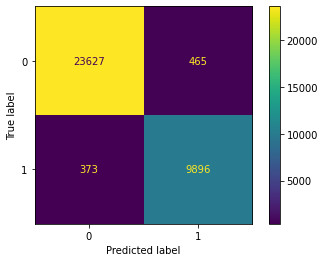

In [18]:
plot_confusion_matrix(knModel,features_test,ifMalware_test)

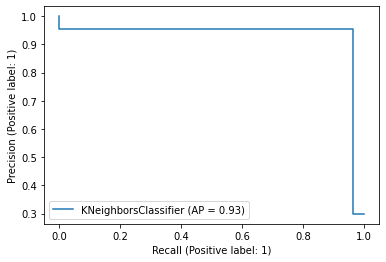

In [19]:
plot_precision_recall_curve(knModel,features_test,ifMalware_test)

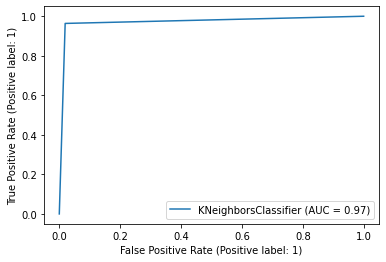

In [20]:
plot_roc_curve(knModel,features_test,ifMalware_test)